In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [2]:
# Download historical stock data for a specific ticker
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2015-01-01', end='2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
display(stock_data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373964,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687304,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689537,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021717,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944679,237458000
...,...,...,...,...,...,...
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974503,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342972,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316292,146266000


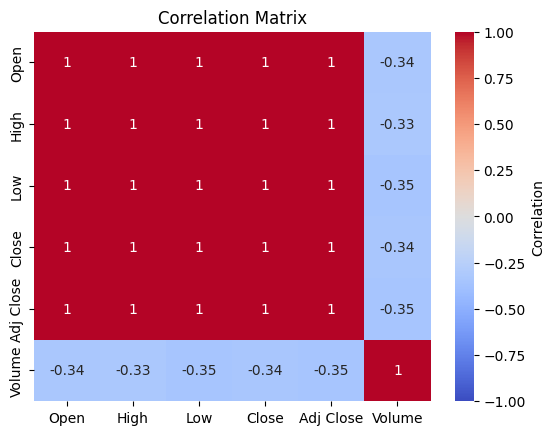

In [4]:
stock_data_df = stock_data
correlation_df = stock_data_df.corr()

sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix')
plt.show()

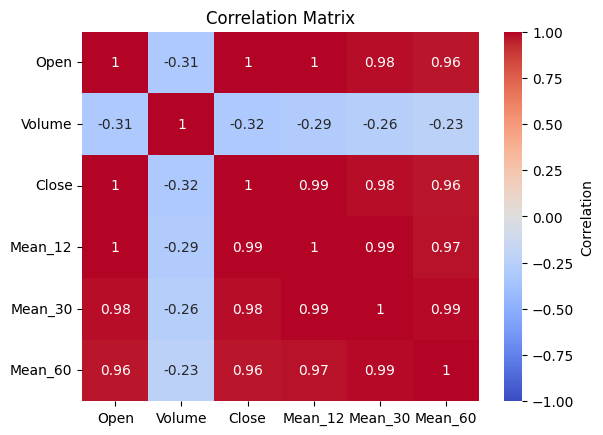

In [20]:
# Feature engineering: create moving average features
stock_data['Mean_12'] = stock_data['Close'].rolling(window=12).mean()
#stock_data['Mean_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Mean_30'] = stock_data['Close'].rolling(window=30).mean()
#stock_data['Mean_40'] = stock_data['Close'].rolling(window=40).mean()
#stock_data['Mean_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Mean_60'] = stock_data['Close'].rolling(window=60).mean()

stock_data_df = stock_data[['Open', 'Volume', 'Close', 'Mean_12', 'Mean_30', 'Mean_60']]
stock_data_df = stock_data_df.dropna()  # Drop rows with missing values

correlation_df = stock_data_df.corr()
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix')
plt.show()

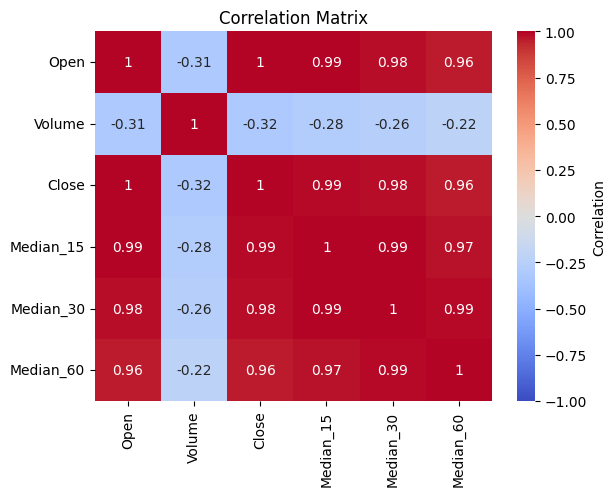

In [14]:
# Feature engineering: create moving average features
#stock_data['Median_10'] = stock_data['Close'].rolling(window=10).median()
stock_data['Median_15'] = stock_data['Close'].rolling(window=15).median()
stock_data['Median_30'] = stock_data['Close'].rolling(window=30).median()
#stock_data['Median_40'] = stock_data['Close'].rolling(window=40).median()
#stock_data['Median_50'] = stock_data['Close'].rolling(window=50).median()
stock_data['Median_60'] = stock_data['Close'].rolling(window=60).median()

stock_data_df = stock_data[['Open', 'Volume', 'Close', 'Median_15', 'Median_30', 'Median_60']]
stock_data_df = stock_data_df.dropna()  # Drop rows with missing values

correlation_df = stock_data_df.corr()
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix')
plt.show()